In [239]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sympy import *
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import random

### Задача №1

In [270]:
# Функция логистической регрессии
f = lambda x: 1 / (1 + np.exp(-x))
x = np.linspace(-10,10,1000)

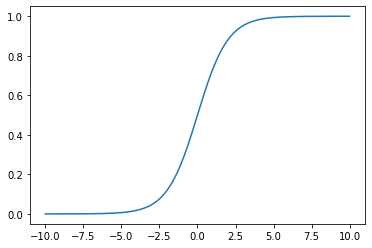

In [271]:
p = []

for i in x:
    p.append(f(i))

plt.plot(x,p)
plt.show()

### Метод градиентного спуска

In [272]:
# Производная для градиентного спуска
f_prime = lambda x: np.exp(-x)/(1 + np.exp(-x))**2

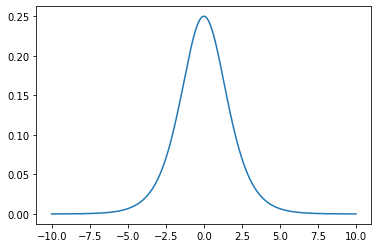

In [273]:
# Нарисуем график первой производной
u = []

for i in x:
    u.append(f_prime(i))

plt.plot(x,u)
plt.show()

In [310]:
lr = 0.1
points = [0.2]
n_epochs = 200

In [311]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [312]:
y_points = [f(p) for p in points]

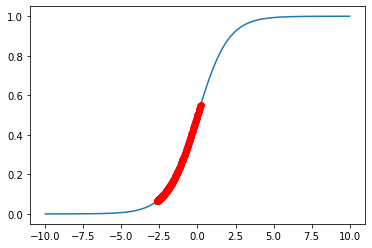

In [313]:
# Построим визуализацию
plt.plot(x,p)
plt.plot(points, y_points, 'ro')
plt.show()

### Метод nesterov momentum

In [291]:
# В основном берется значение коэффициента сохранения равное 0.9
momentum = 0.9
#lr = 0.1
points_n = [3] # начальная точка
n_epochs = 100
v = 0 # что-то вроде скорости

In [295]:
for _ in range(n_epochs):
    old_v = v
    cur_point_n = points_n[-1]
    grad_n = f_prime(cur_point_n)
    v = momentum * v - lr * grad_n
    new_point_n += -momentum * old_v + (1 + momentum) * v
    
    points_n.append(new_point_n)

In [296]:
y_points_n = [f(p) for p in points_n]

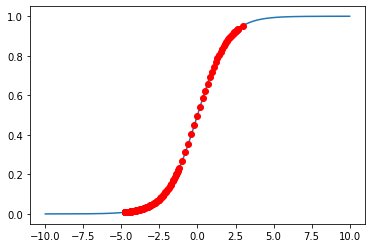

In [297]:
# Построим визуализацию
plt.plot(x,p)
plt.plot(points_n, y_points_n, 'ro')
plt.show()

### Метод rmsprop

In [315]:
# В основном берется значение коэффициента сохранения равное 0.9
points_r = [3] # начальная точка
r_epochs = 100
grad_sqr = 0

In [317]:
for _ in range(r_epochs):
    cur_point_r = points_r[-1]
    grad_r = f_prime(cur_point_r)
    grad_sqr = momentum * grad_sqr + (1 - momentum) * grad_r * grad_r
    new_point_r = cur_point_r - (lr * grad_r / (np.sqrt(grad_sqr) + 1e-7))
    
    points_r.append(new_point_r)

In [318]:
y_points_r = [f(p) for p in points_r]

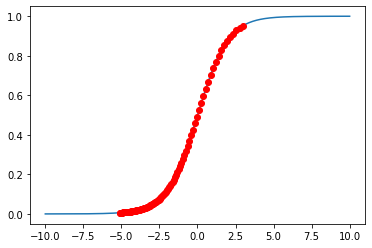

In [319]:
# Построим визуализацию
plt.plot(x,p)
plt.plot(points_r, y_points_r, 'ro')
plt.show()

## Дополнительное задание

In [177]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [183]:
# загружаем данные в датафрейм и выбираем столбцы sepal_length и sepal_width
data = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data_filter = data[data.target.isin([1,2]) ]
data_filter

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [184]:
x = data_filter[['sepal length (cm)', 'sepal width (cm)']] # забираем данные из датасета
y = data_filter['target']

In [192]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [193]:
model = LogisticRegression()

In [194]:
model.fit(x_train,y_train)

LogisticRegression()

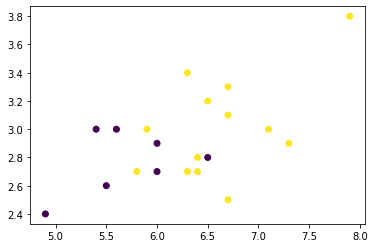

In [195]:
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_test)

In [197]:
print(model.intercept_)
print(model.coef_)

[-9.83150395]
[[1.37451994 0.37351774]]


### Применяем метод градиентного спуска

In [228]:
EPOCHS_1 = 20
LEARNING_RATE_1 = 0.0001
x_1 = x_train.iloc[:, 0]
x_2 = x_train.iloc[:, 1]

In [233]:
costs = []
params = []
preds = []
params = np.random.normal(size=(3,))

In [262]:
for _ in range(EPOCHS_1):
    predictions = params[0] + params[1] * x_1 + params[2] * x_2
    preds.append(predictions)
    
    
    params[0] -= LEARNING_RATE_1 * np.sum(predictions - y_train) / len(predictions)
    params[1] -= LEARNING_RATE_1 * np.sum((predictions - y_train) * x_1) / len(predictions)
    params[2] -= LEARNING_RATE_1 * np.sum((predictions - y_train) * x_2) / len(predictions)

In [263]:
params

array([-0.67434151, -0.53226837,  1.60452059])